## Для самостоятельной работы

1. Сгенерировать датасет при помощи `sklearn.datasets.make_regression` и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.
2. Модифицировать решение первого задания путем добавления $L_{2}$-регуляризации (в функцию, считающую MSE добавить норму весов, а в поправку нужно добавить производную для нормы вектора весов по весам) и сравнить результаты.

In [14]:
from sklearn.datasets import make_regression
from matplotlib import pyplot as plt
import numpy as np

In [85]:
def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err


def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2) # <=> 1/n * np.sum((y_pred - y)**2)
    return err


def gradient_desc(X, y, W, alpha=0.7, e=1e-8):
    errors = []
    
    w_list = [W.copy()]
    X = X.copy().T
    n = X.shape[1]
    err_base = np.inf
    i = 1
    max_iter = 1e5
    
    while True:
        y_pred = np.dot(w_list[-1], X)
        err = calc_mse(y, y_pred)
        
        if abs(err_base - err) < e and i <= max_iter:
            break
        else:
            err_base = err
            
        W_new = w_list[-1] - alpha * (1/n * 2 * X @ (y_pred - y).T)
        
        print(W_new, err)
        W.append(W_new.copy())
        errors.append(err)
        i += 1
        
        if i % 50 == 0:
            alpha /= 1.1
            
    return w_list, errors


def stoch_gradient_desc(X, y, W, alpha=None, e=None):
#     # инициализируем начальный вектор весов
#     w = np.random.randn(2) # Это частный случай

    # список векторов весов после каждой итерации
    w_list = [np.random.randn(2)]

    # список значений ошибок после каждой итерации
    errors = []

    # шаг градиентного спуска
    eta = 0.15

    # максимальное число итераций
    max_iter = 1e5

    # критерий сходимости (разница весов, при которой алгоритм останавливается)
    min_weight_dist = 1e-8

    # зададим начальную разницу весов большим числом
    weight_dist = np.inf

    # счетчик итераций
    iter_num = 0
    lamb = 0.01 
    np.random.seed(1234)

    Q = [0]  

    # ход градиентного спуска
    while weight_dist > min_weight_dist and iter_num < max_iter:

        # генерируем случайный индекс объекта выборки
        train_ind = np.random.randint(X.shape[0])
        
        y_pred_i = np.dot(X[train_ind], w)
        new_w = w - (2 * eta * np.dot(X[train_ind].T, (y_pred_i - y[train_ind])) / y.shape[0])

        weight_dist = np.linalg.norm(new_w - w, ord=2)

        w_list.append(new_w.copy())
        errors.append(mserror(data, new_w, target))
        Q.append(Q[-1] * (1 - lamb) + lamb * (np.dot(data[train_ind], w) - target[train_ind])**2)
        iter_num += 1
        w = new_w

        if i % 50 == 0:
            alpha /= 1.1
            
    return w_list, Q, errors


In [22]:
data, target, coef = make_regression(1000, 2, coef = True)

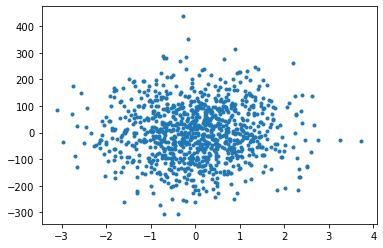

In [23]:
plt.plot(datar[:,0], target,'.')
plt.show()

In [28]:
data.shape, coef

((1000, 2), array([39.19642017, 97.78848351]))

In [91]:
weights_init = [np.random.randn(2)]
W, errs = gradient_desc(data, target, weights_init)
W, errs

([[array([1.05446843, 0.38589178])]], [])

In [77]:
W = [weights_init.copy()]
print(W[-1], data.T)
y_pred = np.dot(W[-1], data.T)

W[-1] - 0.15 * (1/10 * 2 * data.T @ (y_pred - target).T)

[array([0.7184675 , 0.58237356])] [[ 0.75402941  1.81601014 -0.45211858 ...  0.89532968 -0.15357738
   2.0332726 ]
 [-0.93221466 -0.77890356  0.60064962 ... -0.61429426 -0.44218801
   0.21508907]]


array([[1164.11527717, 1163.97918323],
       [2901.33534767, 2901.19925373]])

In [75]:
(y_pred - target).T.shape

(1000, 1)

In [72]:
data.shape

(1000, 2)

In [ ]:
# Визуализируем изменение весов (красной точкой обозначены истинные веса, сгенерированные вначале)
plt.figure(figsize=(13, 6))
plt.title('Stochastic gradient descent')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(w_list[:, 0], w_list[:, 1])
plt.scatter(coef[0], coef[1], c='r')
# plt.plot(w_list[:, 0], w_list[:, 1])

plt.show()

In [ ]:
# инициализируем начальный вектор весов
w = np.random.randn(2) # Это частный случай
 
# список векторов весов после каждой итерации
w_list = [w.copy()]
 
# список значений ошибок после каждой итерации
errors = []
 
# шаг градиентного спуска
eta = 0.15
 
# максимальное число итераций
max_iter = 1e5
 
# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8
 
# зададим начальную разницу весов большим числом
weight_dist = np.inf
 
# счетчик итераций
iter_num = 0
lamb = 0.01 
np.random.seed(1234)

Q = [0]  

# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    
    # генерируем случайный индекс объекта выборки
    train_ind = np.random.randint(data.shape[0])
    
    new_w = w - 2 * eta * np.dot(data[train_ind].T, (np.dot(data[train_ind], w) - target[train_ind])) / target.shape[0]
 
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    w_list.append(new_w.copy())
    errors.append(mserror(data, new_w, target))
    Q.append(Q[-1] * (1 - lamb) + lamb * (np.dot(data[train_ind], w) - target[train_ind])**2)
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)
 
print(f'В случае использования стохастического градиентного спуска функционал ошибки составляет {round(errors[-1], 4)}')